PCA 

In [23]:
#copied mainly from https://machinelearningmastery.com/principal-component-analysis-for-visualization/ 
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [24]:
# Load dataset
winedata = load_wine()
X = winedata['data']
y = winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target Output: \n", y) #y has 3 classes
print("Feature Names: \n", winedata["feature_names"])
print("Target Names: \n", winedata["target_names"])


X shape: (178, 13)
y shape: (178,)
Target Output: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Feature Names: 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: 
 ['class_0' 'class_1' 'class_2']


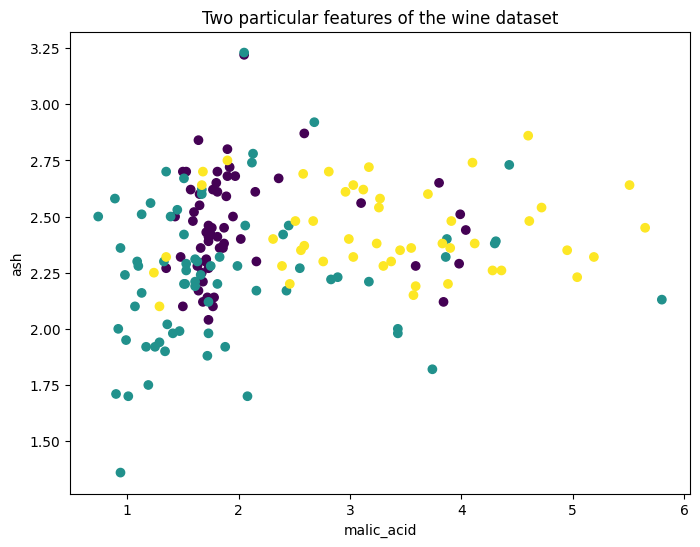

In [25]:
# Scatter plot any two features f1 and f2
f1 = 1
f2 = 2
plt.figure(figsize=(8,6))
plt.scatter(X[:,f1], X[:,f2], c=y)
plt.xlabel(winedata["feature_names"][f1])
plt.ylabel(winedata["feature_names"][f2])
plt.title("Two particular features of the wine dataset")
plt.show()

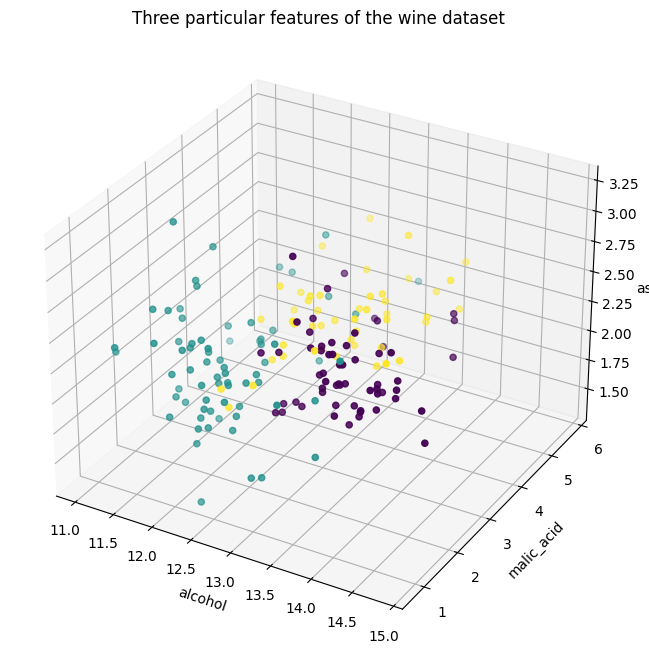

In [26]:
# Scatter Plot any 3 features f1, f2, and f3
f1 = 0
f2 = 1
f3 = 2
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
#plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
ax.scatter(X[:,f1], X[:,f2], X[:,f3], c=y)
ax.set_xlabel(winedata["feature_names"][f1])
ax.set_ylabel(winedata["feature_names"][f2])
ax.set_zlabel(winedata["feature_names"][f3])
ax.set_title("Three particular features of the wine dataset")
plt.show()

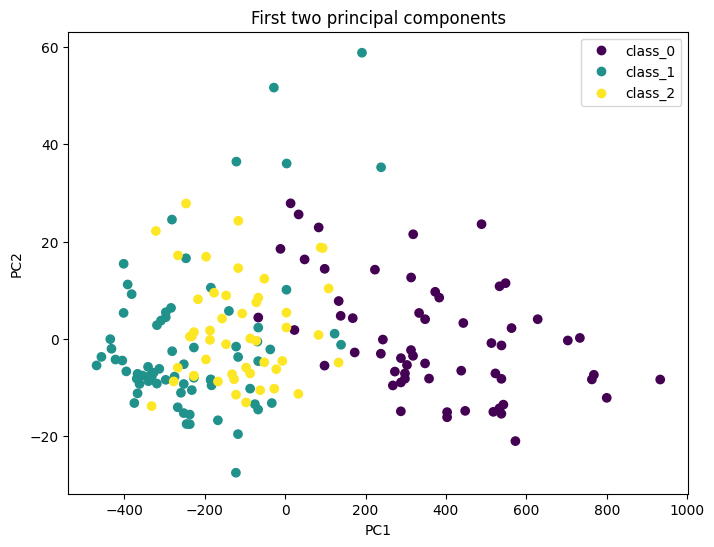

In [27]:
# Show first two principal components without scaler
pca = PCA() 
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X) #Full PCA is done on feature set X
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y) #first 2 principal components are selected
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

In [28]:
pcs = PCA()
pipe = Pipeline([('scalar', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
info_preserved = sum(variance_ratio[:2]) * 100
print("Explained variance ratios:")
print(pca.explained_variance_ratio_)
print("percentage of information preserved in the first two principal components:", info_preserved, "%")

Explained variance ratios:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
percentage of information preserved in the first two principal components: 55.406338356935315 %


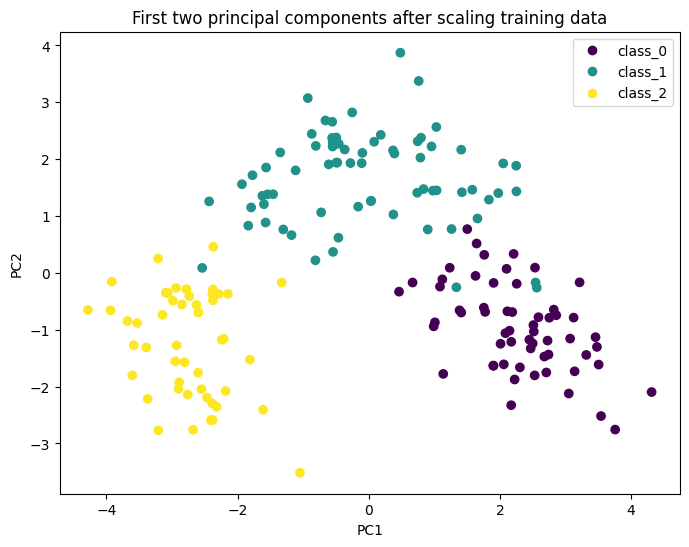

In [29]:
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling training data")
plt.show()

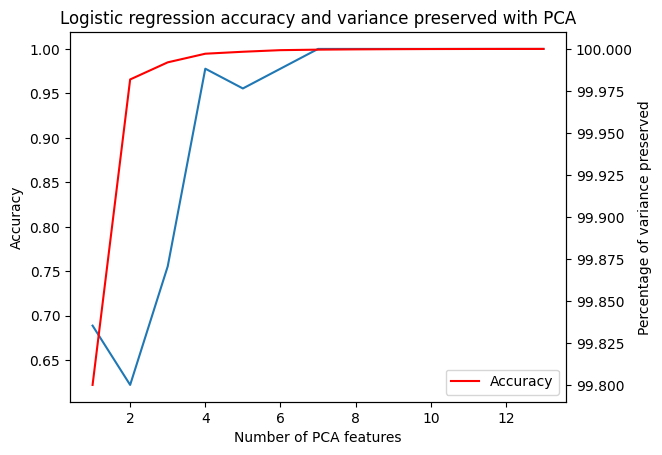

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Calculate accuracy and variance preserved for different numbers of PCA features
pca = PCA()
accuracy_scores = []
variance_preserved = []
for i in range(1, 14):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = LogisticRegression(max_iter=1060)
    model.fit(X_train_pca, y_train)
    accuracy = model.score(X_test_pca, y_test)
    accuracy_scores.append(accuracy)
    variance_preserved.append(sum(pca.explained_variance_ratio_) * 100)

# Plot accuracy scores and variance preserved
plt.plot(range(1, 14), accuracy_scores)
plt.xlabel("Number of PCA features")
plt.ylabel("Accuracy")
plt.twinx()
plt.plot(range(1, 14), variance_preserved, color='red')
plt.ylabel("Percentage of variance preserved")
plt.title("Logistic regression accuracy and variance preserved with PCA")
plt.legend(["Accuracy", "Variance Preserved"])
plt.show()


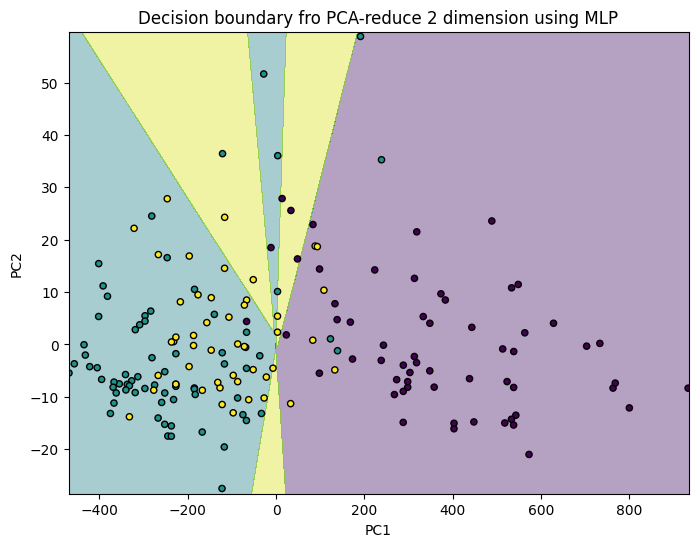

In [31]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# reduce to 2 dimension
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train perceptron model
model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
model.fit(X_pca, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k')
plt.title("Decision boundary fro PCA-reduce 2 dimension using MLP")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Digits Data
PCA reduced to 2 dimensions will not work well for digits data

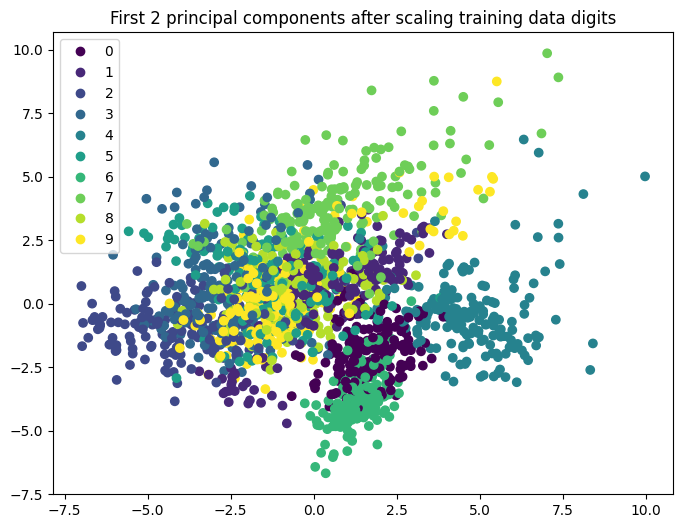

In [32]:
from sklearn.datasets import load_digits
digitsdata = load_digits()
X, y = digitsdata['data'], digitsdata['target']
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(digitsdata['target_names']))
plt.title("First 2 principal components after scaling training data digits")
plt.show()

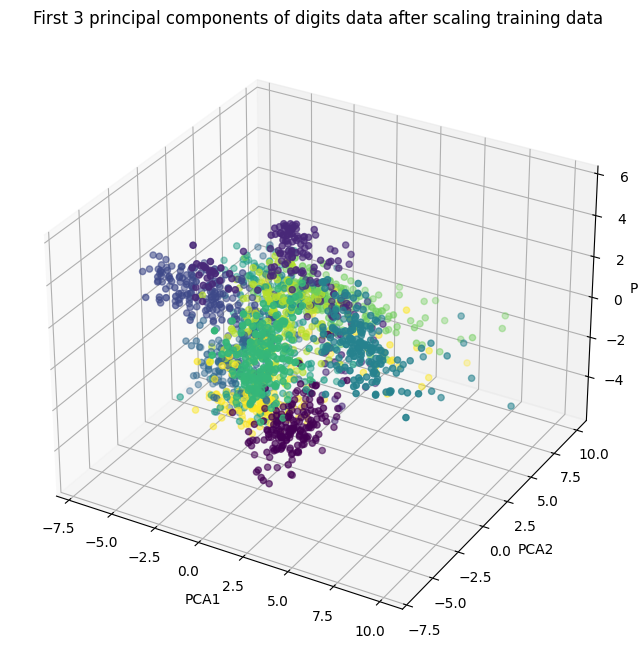

In [33]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xt[:,0], Xt[:,1], Xt[:,2], c=y)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("First 3 principal components of digits data after scaling training data")
plt.show()

On Iris Dataset

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVC

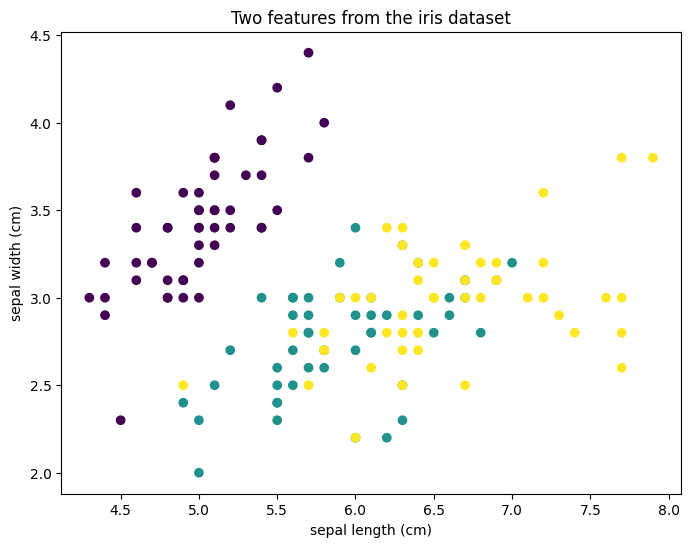

In [35]:
# Load iris dataset
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset")
plt.show()

In [36]:
# Show the principal components
pca = PCA().fit(X)
print("Principal components:")
print(pca.components_) #Rotation matrix

Principal components:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


In [37]:
pcs = PCA()
pipe = Pipeline([('scalar', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_
info_preserved = sum(variance_ratio[:2]) * 100
print("Explained variance ratios:")
print(pca.explained_variance_ratio_)
print("percentage of information preserved in the first two principal components:", info_preserved, "%")

Explained variance ratios:
[0.72962445 0.22850762 0.03668922 0.00517871]
percentage of information preserved in the first two principal components: 95.81320720000164 %


In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Run classifer on all features
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

Using all features, accuracy:  0.98
Using all features, F1:  0.9781196581196582


In [39]:
# Run classifier on PC1 (only 1 feature)
mean = X_train.mean(axis=0) #find the mean over matrix X_train along the column to get vector
X_train2 = X_train - mean #Each training is subtracted by mean
print("X_train2 after subtract mean\n", X_train2)
X_train2 = (X_train2 @ pca.components_[0]) #X_Mx4 @ pca_4x4[0]_4x1 -> Mx1
print("X_train2 after PC1\n", X_train2)
X_train2 = X_train2.reshape(-1,1) #reshaped from vector of 1 row into a matrix of many rows (1 col)
print("X_train2 after PC1 and reshape\n", X_train2) 

X_train2 after subtract mean
 [[ 0.674 -0.087  1.458  0.791]
 [ 1.074  0.013  1.358  1.091]
 [ 0.574 -0.387  1.558  0.691]
 [-0.126 -0.487 -0.242 -0.209]
 [ 0.774 -0.087  0.658  0.191]
 [-0.926  0.013 -2.242 -1.109]
 [-0.426  0.313 -2.242 -0.809]
 [ 0.174 -0.387  1.358  0.391]
 [-0.026 -0.387  1.358  0.691]
 [-0.426  0.813 -2.442 -0.809]
 [-0.426 -0.087  0.758  0.291]
 [ 0.774 -0.187  0.858  0.091]
 [-0.926  0.513 -2.342 -1.109]
 [-0.226 -0.587  0.158 -0.109]
 [-1.226  0.513 -2.742 -1.009]
 [-0.826  0.513 -2.342 -1.009]
 [ 0.874  0.013  0.958  0.291]
 [ 0.474  0.213  2.258  1.291]
 [ 0.574 -0.287  1.858  0.891]
 [ 0.274 -0.087  0.858  0.191]
 [-1.426 -0.087 -2.442 -1.009]
 [ 0.274 -0.287  0.258  0.091]
 [ 0.574 -0.187  0.558  0.091]
 [ 0.674  0.113  1.358  0.791]
 [-0.426  0.613 -2.242 -1.009]
 [-0.926  0.013 -2.242 -1.009]
 [ 0.074 -0.087  0.458  0.291]
 [-0.626  1.013 -2.242 -1.109]
 [-0.026 -0.487  0.258 -0.009]
 [ 0.474 -0.587  1.258  0.691]
 [ 1.874 -0.087  2.358  1.091]
 [ 1.874 

In [40]:
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train) #Use Support Vector Classifier - hyper plane to separate classes
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))

Using PC1, accuracy:  0.92
Using PC1, F1:  0.9136302294197032


DECISION BOUNDARIES

In [41]:
from itertools import product
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay


In [42]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target


In [43]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

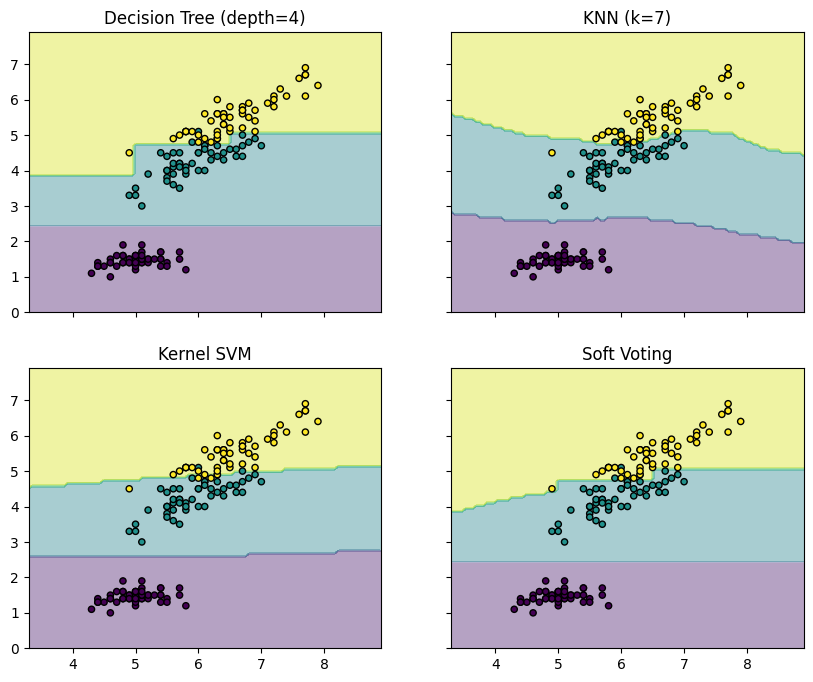

In [44]:
# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()